# Further hypothesis testing

## Chapter 2. ANOVA and $\chi^{2}$ test.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### 2.1 Comparing means of more than two groups

During the course of your investigations for Dr Howe, you have noticed that the distributions of the dwarf stars' luminosities (types 0, 1 and 2) are also overlapping.

#### i) Explore data

The question we will ask now is: do types 0, 1 and 2 have the same mean luminosity?

In [3]:
# Load data
data = pd.read_csv("stars.csv")
type_key = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant','Hypergiant']

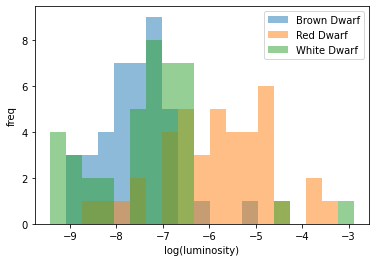

In [4]:
# Focus on types 0, 1, 2
types = [0,1,2]

sample = data.luminosity.apply(np.log)
grouped = sample.groupby(data.type)

xlab = 'log(luminosity)'
ylab = 'freq'

displayed = pd.concat([grouped.get_group(t) for t in types])
bins = np.linspace(displayed.min(), displayed.max(), 20)
ax = plt.axes()
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)

for t in types:
    plt.hist(grouped.get_group(t), bins, alpha=0.5, label=type_key[t], color='C' + str(t))

ax.legend(loc='upper right')
plt.show()

#### ii) One-way ANOVA

The t-test can only compare the means of two samples (or one sample with a theoretical mean).

To move beyond two samples, we need to use a different method called analysis of variance (ANOVA).

$H_0$: All of the groups have identical means:  $\mu = \mu_1 = \mu_2 = \mu_3$.

$H_1$: Not all of the group means are identical.

The one-way (also known as single-factor) ANOVA uses the F-test to compare the within-group and between-group variation:

$$F = \frac{\text{between-group variation}}{\text{within-group variation}}$$

Under $H_0$, $F$ follows an F-distribution with parameters $(g-1,n_T-g)$, where $g$ is the number of groups (here, 3 types of star), and $n_T$ is the total number of observations.

Once again, the F-distribution provides a p-value associated with the calculated value of $F$.

#### Assumptions

- Observations are independent.
- Populations are normally distributed.
- Variances of the populations are equal.



#### Application

We will set $\alpha=0.05$.

In [5]:
stats.f_oneway(grouped.get_group(0),grouped.get_group(1),grouped.get_group(2))

F_onewayResult(statistic=29.532539505986634, pvalue=4.139893740792867e-11)

Here we have $p<\alpha$, so we reject $H_0$: the three groups do not appear to have the same mean luminosity.

### Other types of ANOVA

ANOVA is an important element of statistical analysis when we are interested in comparing the effects of different treatments. 

The underlying statistical model changes, depending on the expected relationship between treatment and effect (*fixed-*, *random-* or *mixed-effects*).

Where multiple variables change simultaneously (for example, in patient populations), we may need to consider *multiple factors* (e.g. *two-way ANOVA*) and the *interactions* between factors.

<br>